In [1]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
from legendgram import legendgram
import seaborn as sns

In [2]:
df19 = pd.read_csv('LFB 2019 Incident data.csv')
print(f"Data frame is {df19.shape[0]:,} x {df19.shape[1]}")
df19.head(5)

Data frame is 105,008 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,209488,000287-01012019,2019/1/1,2019,2:39:50 AM,2,False Alarm,AFA,NaN,Dwelling,...,Peckham,356.0,New Cross,655.0,Greenwich,2.0,2.0,2.0,1.0,333.0
1,209489,000175-01012019,2019/1/1,2019,1:04:04 AM,1,Fire,Secondary Fire,NaN,Outdoor Structure,...,Feltham,460.0,Feltham,NaN,NaN,1.0,1.0,1.0,1.0,333.0
2,209490,000159-01012019,2019/1/1,2019,12:54:41 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,Southall,241.0,Southall,NaN,NaN,1.0,1.0,1.0,1.0,333.0
3,209491,000610-01012019,2019/1/1,2019,8:29:28 PM,20,Fire,Secondary Fire,NaN,Outdoor Structure,...,Peckham,273.0,New Cross,NaN,NaN,1.0,1.0,1.0,1.0,333.0
4,209492,000630-01012019,2019/1/1,2019,9:27:27 PM,21,False Alarm,False alarm - Good intent,NaN,Dwelling,...,Poplar,284.0,Poplar,516.0,Millwall,2.0,2.0,2.0,1.0,333.0


In [3]:
df_fire19 = df19[df19.IncidentGroup=='Fire']
print(f"Data frame is {df_fire19.shape[0]:,} x {df_fire19.shape[1]}")
df_fire19.head(5)

Data frame is 17,982 x 39


,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
1,209489,000175-01012019,2019/1/1,2019,1:04:04 AM,1,Fire,Secondary Fire,NaN,Outdoor Structure,...,Feltham,460.0,Feltham,NaN,NaN,1.0,1.0,1.0,1.0,333.0
2,209490,000159-01012019,2019/1/1,2019,12:54:41 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,Southall,241.0,Southall,NaN,NaN,1.0,1.0,1.0,1.0,333.0
3,209491,000610-01012019,2019/1/1,2019,8:29:28 PM,20,Fire,Secondary Fire,NaN,Outdoor Structure,...,Peckham,273.0,New Cross,NaN,NaN,1.0,1.0,1.0,1.0,333.0
11,209499,000487-01012019,2019/1/1,2019,3:24:32 PM,15,Fire,Secondary Fire,NaN,Outdoor,...,Dowgate,219.0,Dowgate,NaN,NaN,1.0,1.0,1.0,1.0,333.0
16,209504,000123-01012019,2019/1/1,2019,12:35:27 AM,0,Fire,Secondary Fire,NaN,Outdoor,...,New Malden,415.0,Kingston,503.0,Twickenham,2.0,2.0,2.0,1.0,333.0


In [4]:
df_fire19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17982 entries, 1 to 105001
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              17982 non-null  int64  
 1   IncidentNumber                          17982 non-null  object 
 2   DateOfCall                              17982 non-null  object 
 3   CalYear                                 17982 non-null  int64  
 4   TimeOfCall                              17982 non-null  object 
 5   HourOfCall                              17982 non-null  int64  
 6   IncidentGroup                           17982 non-null  object 
 7   StopCodeDescription                     17982 non-null  object 
 8   SpecialServiceType                      0 non-null      object 
 9   PropertyCategory                        17982 non-null  object 
 10  PropertyType                            17982 non-null  o

In [5]:
borough = gpd.read_file('London_boroughs.gpkg')
borough = borough.to_crs('epsg:27700')
drop_columns = ['NONLD_AREA','ONS_INNER']
borough.drop(columns=drop_columns, axis=1,inplace=True)

In [6]:
df_clean19= pd.DataFrame()

df_clean19['date'] = df_fire19['DateOfCall']
df_clean19['hour'] = df_fire19['HourOfCall']
df_clean19['IncidentGroup'] = df_fire19['IncidentGroup']
df_clean19['PropertyCategory'] = df_fire19['PropertyCategory']
df_clean19['StopCodeDescription'] = df_fire19['StopCodeDescription']
df_clean19['brough_code'] = df_fire19['IncGeo_BoroughCode']
df_clean19['ward_code'] = df_fire19['IncGeo_WardCode']
df_clean19['borough'] = df_fire19['ProperCase']
df_clean19 = df_clean19.reset_index()
df_clean19.drop(columns='index', axis=1,inplace=True)
print('Shape of data:',df_clean19.shape)
df_clean19.head()

Shape of data: (17982, 8)


,date,hour,IncidentGroup,PropertyCategory,StopCodeDescription,brough_code,ward_code,borough
0,2019/1/1,1,Fire,Outdoor Structure,Secondary Fire,E09000018,E05000357,Hounslow
1,2019/1/1,0,Fire,Outdoor,Secondary Fire,E09000009,E05000177,Ealing
2,2019/1/1,20,Fire,Outdoor Structure,Secondary Fire,E09000028,E05011113,Southwark
3,2019/1/1,15,Fire,Outdoor,Secondary Fire,E09000028,E05011095,Southwark
4,2019/1/1,0,Fire,Outdoor,Secondary Fire,E09000021,E05000407,Kingston Upon thames


In [7]:
df19 = pd.merge(left=df_clean19, right=borough, how='left', left_on='brough_code', right_on='GSS_CODE')
df19.drop(columns=['NAME'],axis=1,inplace=True)
print('Shape of data:',df19.shape)
df19.head()

Shape of data: (17982, 11)


,date,hour,IncidentGroup,PropertyCategory,StopCodeDescription,brough_code,ward_code,borough,GSS_CODE,HECTARES,geometry
0,2019/1/1,1,Fire,Outdoor Structure,Secondary Fire,E09000018,E05000357,Hounslow,E09000018,5658.541,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
1,2019/1/1,0,Fire,Outdoor,Secondary Fire,E09000009,E05000177,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
2,2019/1/1,20,Fire,Outdoor Structure,Secondary Fire,E09000028,E05011113,Southwark,E09000028,2991.340,"MULTIPOLYGON (((531335.600 180529.500, 531337...."
3,2019/1/1,15,Fire,Outdoor,Secondary Fire,E09000028,E05011095,Southwark,E09000028,2991.340,"MULTIPOLYGON (((531335.600 180529.500, 531337...."
4,2019/1/1,0,Fire,Outdoor,Secondary Fire,E09000021,E05000407,Kingston Upon thames,E09000021,3726.117,"MULTIPOLYGON (((516401.600 160201.800, 516407...."


In [8]:
df19['date'] = pd.to_datetime(df19['date'], infer_datetime_format=True)
df19['hour'] = df19['hour'].astype("category")
df19['brough_code'] = df19['brough_code'].astype("category")
df19['ward_code'] = df19['ward_code'].astype("category")
df19['borough'] = df19['borough'].astype("category")
df19['GSS_CODE'] = df19['GSS_CODE'].astype("category")
df19['month'] = df19['date'].dt.month.astype("category")

In [9]:
print('Shape of cleaned data:',df19.shape)
df19.head()

Shape of cleaned data: (17982, 12)


,date,hour,IncidentGroup,PropertyCategory,StopCodeDescription,brough_code,ward_code,borough,GSS_CODE,HECTARES,geometry,month
0,2019-01-01,1,Fire,Outdoor Structure,Secondary Fire,E09000018,E05000357,Hounslow,E09000018,5658.541,"MULTIPOLYGON (((521975.800 178100.000, 521967....",1
1,2019-01-01,0,Fire,Outdoor,Secondary Fire,E09000009,E05000177,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249....",1
2,2019-01-01,20,Fire,Outdoor Structure,Secondary Fire,E09000028,E05011113,Southwark,E09000028,2991.340,"MULTIPOLYGON (((531335.600 180529.500, 531337....",1
3,2019-01-01,15,Fire,Outdoor,Secondary Fire,E09000028,E05011095,Southwark,E09000028,2991.340,"MULTIPOLYGON (((531335.600 180529.500, 531337....",1
4,2019-01-01,0,Fire,Outdoor,Secondary Fire,E09000021,E05000407,Kingston Upon thames,E09000021,3726.117,"MULTIPOLYGON (((516401.600 160201.800, 516407....",1


In [10]:
fire_month19=df19.groupby('month').size()
incident_month19=pd.DataFrame()
month_list = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov','Dec'])
incident_month19['month'] = month_list
incident_month19['Incidents']=np.array(fire_month19)
incident_month19

,month,Incidents
0,Jan,1335
1,Feb,1160
2,Mar,1414
3,Apr,1665
4,May,1866
5,Jun,1624
6,Jul,1931
7,Aug,1665
8,Sept,1722
9,Oct,1243


In [11]:
fire_hour19=df19.groupby('hour').size()
incident_hour19=pd.DataFrame()
hour_list = np.array(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
incident_hour19['hour'] = hour_list
incident_hour19['Incidents']=np.array(fire_hour19)
incident_hour19.head()

,hour,Incidents
0,0,621
1,1,544
2,2,427
3,3,383
4,4,316


In [12]:
# Hierarchical clustering
hour_month=df19.groupby('hour').month.value_counts(sort=True)
hour_month=hour_month.unstack().fillna(0)
hour_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,61,35,48,53,59,61,60,45,64,46,50,39
1,61,29,28,39,57,54,52,41,48,45,47,43
2,41,33,36,39,39,32,34,40,44,28,24,37
3,32,26,22,31,29,39,51,38,47,22,20,26
4,32,22,32,26,34,35,28,28,26,21,17,15


Text(0.5, 1.0, 'Heatmap of London Fire Incident Number in 2019 (Grouped by Month and Hour)')

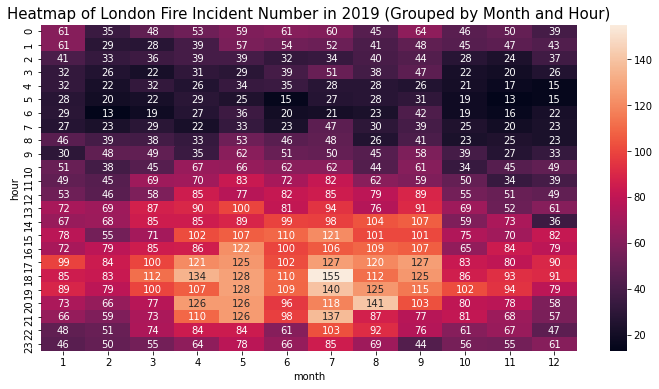

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(hour_month, annot=True, fmt="d",ax=ax)
plt.title('Heatmap of London Fire Incident Number in 2019 (Grouped by Month and Hour)',fontsize = 15)


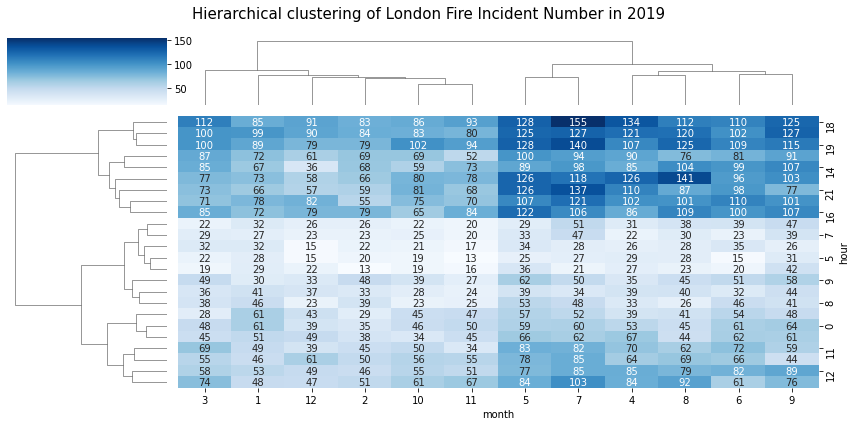

In [22]:
Hierarchical_clustering = sns.clustermap(hour_month, annot=True, fmt="d",figsize=(12,6),cmap="Blues")
Hierarchical_clustering.fig.suptitle('Hierarchical clustering of London Fire Incident Number in 2019',fontsize = 15)
plt.tight_layout()

In [16]:
dfpop= pd.read_csv('borough popualtion 2020.csv')

In [17]:
dfpop.head()

,gss_code,BoroughName,population
0,E09000002,Barking and Dagenham,214107
1,E09000003,Barnet,399007
2,E09000004,Bexley,249301
3,E09000005,Brent,327753
4,E09000006,Bromley,332752


In [18]:
borough_fire_count=pd.DataFrame()
borough_fire_count['count'] = df19.groupby('brough_code').size()
borough_fire_count.reset_index(inplace=True)
borough_fire_count.columns = ['borough','count']

fire_borough = pd.merge(left=borough, right=borough_fire_count, how='left', left_on='GSS_CODE', right_on='borough')

fire_borough_final = pd.concat([fire_borough,dfpop],axis=1)

In [19]:
fire_borough_final.head()

,NAME,GSS_CODE,HECTARES,geometry,borough,count,gss_code,BoroughName,population
0,Kingston upon Thames,E09000021,3726.117,"MULTIPOLYGON (((516401.600 160201.800, 516407....",E09000021,279,E09000002,Barking and Dagenham,214107
1,Croydon,E09000008,8649.441,"MULTIPOLYGON (((535009.200 159504.700, 535005....",E09000008,725,E09000003,Barnet,399007
2,Bromley,E09000006,15013.487,"MULTIPOLYGON (((540373.600 157530.400, 540361....",E09000006,672,E09000004,Bexley,249301
3,Hounslow,E09000018,5658.541,"MULTIPOLYGON (((521975.800 178100.000, 521967....",E09000018,683,E09000005,Brent,327753
4,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249....",E09000009,659,E09000006,Bromley,332752


In [20]:
fire_borough_final['density'] = round(fire_borough_final['count']/fire_borough_final['population']*1000,2).astype('float')
# check the data
print('Shape of fire_borough dataframe:',fire_borough_final.shape)
fire_borough_final.head()

Shape of fire_borough dataframe: (33, 10)


,NAME,GSS_CODE,HECTARES,geometry,borough,count,gss_code,BoroughName,population,density
0,Kingston upon Thames,E09000021,3726.117,"MULTIPOLYGON (((516401.600 160201.800, 516407....",E09000021,279,E09000002,Barking and Dagenham,214107,1.30
1,Croydon,E09000008,8649.441,"MULTIPOLYGON (((535009.200 159504.700, 535005....",E09000008,725,E09000003,Barnet,399007,1.82
2,Bromley,E09000006,15013.487,"MULTIPOLYGON (((540373.600 157530.400, 540361....",E09000006,672,E09000004,Bexley,249301,2.70
3,Hounslow,E09000018,5658.541,"MULTIPOLYGON (((521975.800 178100.000, 521967....",E09000018,683,E09000005,Brent,327753,2.08
4,Ealing,E09000009,5554.428,"MULTIPOLYGON (((510253.500 182881.600, 510249....",E09000009,659,E09000006,Bromley,332752,1.98


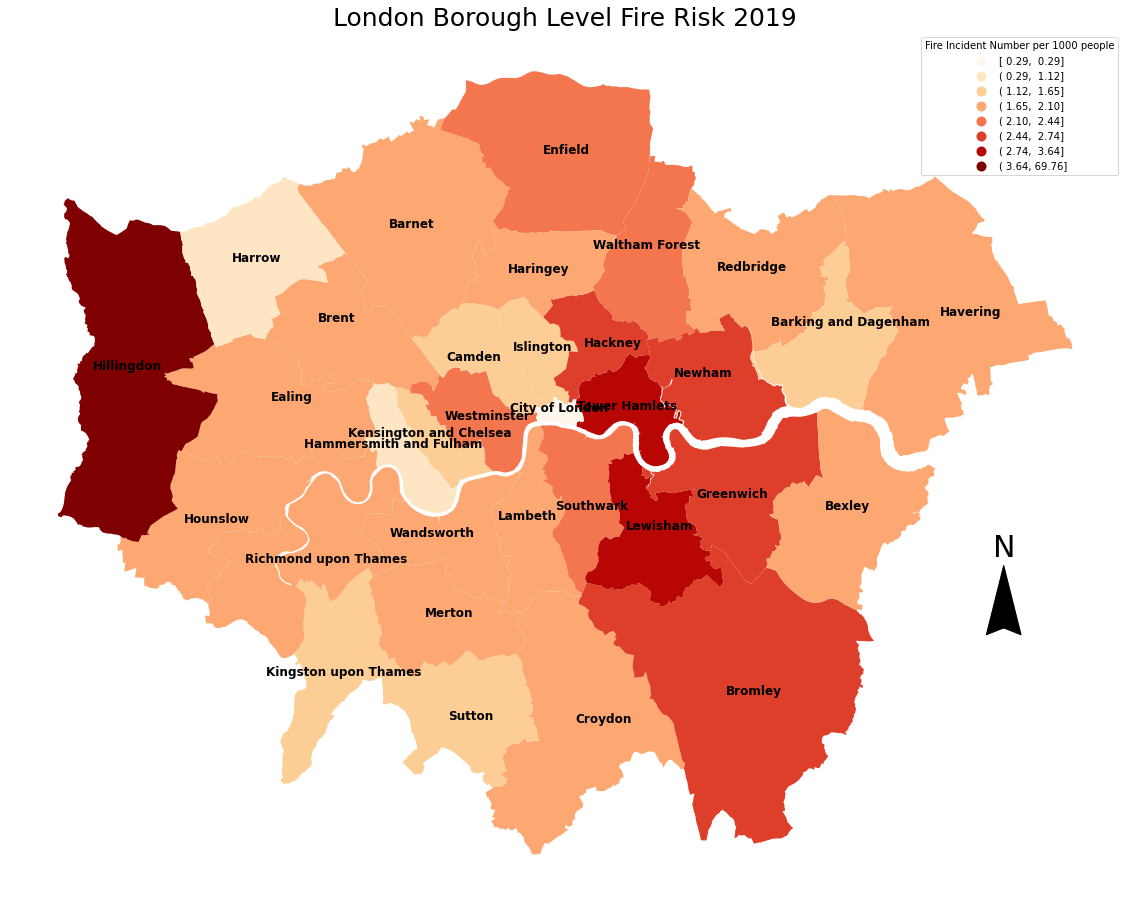

In [21]:
def London_fire_risk():
    a,ax = plt.subplots(figsize=(20,25))
    
    # Plot the density of fire in each ward
    fire_borough_final.plot(ax=ax,column='density', cmap='OrRd',edgecolor='None',
              scheme='NaturalBreaks',k=8,legend=True)
    
    ax.set_title('London Borough Level Fire Risk 2019', fontdict={'fontsize':'25', 'fontweight':'3'})
    ax.get_legend().set_title("Fire Incident Number per 1000 people")
    # Add borough label to the map
    f=fire_borough_final
    f['location'] = f['geometry'].apply(lambda x: x.representative_point().coords[:])
    f['location'] = [coords[0] for coords in f['location']]
    for idx, row in f.iterrows():
        plt.annotate(text=row['NAME'], xy=row['location'],horizontalalignment='center',color='black',weight = 'bold',size = 'large')
    
    ax.text(x=557400, y=173000, s='N', fontsize=30)
    ax.arrow(558000, 171500, 0, 1000, length_includes_head=True,
          head_width=2000, head_length=4000, overhang=.1, facecolor='k')
    ax.axis('off') 
    
London_fire_risk()